<hr>

**Time Series Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('stockmarket.csv')  # Update with the correct file path


In [3]:
df

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
1,2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2,2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
3,2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
4,2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0
...,...,...,...,...,...,...,...
4078,2021-07-26,2110.0000,2121.6001,2071.7000,2077.7000,378150.0,0.0
4079,2021-07-27,2079.0000,2083.5000,2041.2000,2054.3000,271432.0,0.0
4080,2021-07-28,2060.1001,2060.1499,2016.6000,2036.8500,207230.0,0.0
4081,2021-07-29,2050.0000,2074.3999,2043.7500,2055.2500,142646.0,0.0


In [4]:
df.head()

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
1,2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2,2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
3,2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
4,2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0


In [5]:
# Task 3: Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

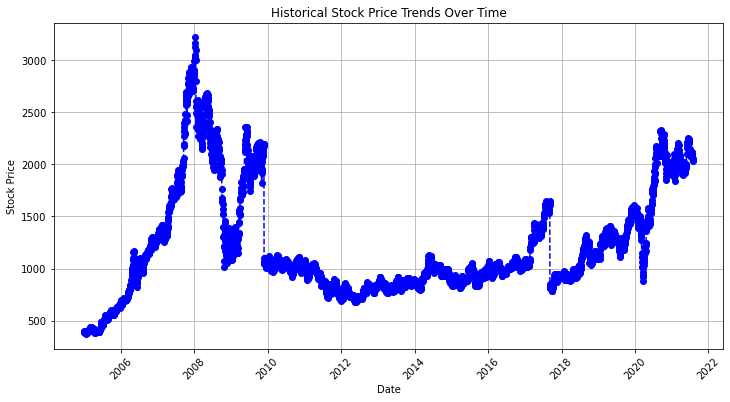

In [6]:
# Task 4: Visualize historical stock price trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], marker='o', linestyle='--', color='b')
plt.title('Historical Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

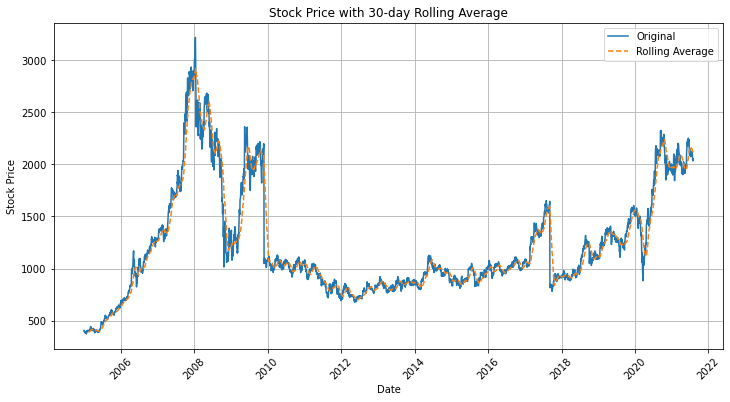

In [7]:
# Task 5: Calculate and plot moving averages or rolling averages
df['Rolling_Avg'] = df['close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Original')
plt.plot(df['date'], df['Rolling_Avg'], label='Rolling Average', linestyle='--')
plt.title('Stock Price with 30-day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

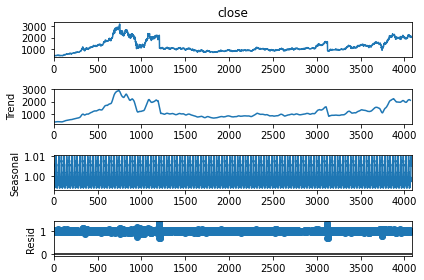

In [8]:
# Task 6: Perform seasonality analysis
result = seasonal_decompose(df['close'], model='multiplicative', period=30)
result.plot()
plt.show()

In [9]:
# Task 7: Analyze and plot the correlation between stock prices and other variables
correlation_matrix = df[['close', 'volume', 'high']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           close    volume      high
close   1.000000 -0.012798  0.999349
volume -0.012798  1.000000 -0.011225
high    0.999349 -0.011225  1.000000


In [10]:
# Task 8: Use ARIMA model to forecast future stock prices
model = ARIMA(df['close'], order=(5, 1, 0))  # Example ARIMA model with order (5,1,0)
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)  # Forecasting 30 steps ahead
print("Forecasted Stock Prices:")
print(forecast)

Forecasted Stock Prices:
4083    2037.564565
4084    2037.665196
4085    2038.904435
4086    2038.961306
4087    2039.452497
4088    2039.316182
4089    2039.260735
4090    2039.187045
4091    2039.175235
4092    2039.169381
4093    2039.180221
4094    2039.185601
4095    2039.188720
4096    2039.188610
4097    2039.188017
4098    2039.187277
4099    2039.186996
4100    2039.186943
4101    2039.187017
4102    2039.187082
4103    2039.187119
4104    2039.187125
4105    2039.187120
4106    2039.187112
4107    2039.187108
4108    2039.187107
4109    2039.187108
4110    2039.187109
4111    2039.187109
4112    2039.187109
Name: predicted_mean, dtype: float64
